# Import necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load training dataset

In [2]:
#bring in the six packs
df_train = pd.read_csv('train_data.csv')
df_pred_all = pd.read_csv('test_data.csv')

# Explore the columns

In [3]:
df_train.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'type', u'quality'],
      dtype='object')

# Summary of the features

In [3]:
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 13 columns):
fixed acidity           5150 non-null float64
volatile acidity        5150 non-null float64
citric acid             5150 non-null float64
residual sugar          5150 non-null float64
chlorides               5150 non-null float64
free sulfur dioxide     5150 non-null float64
total sulfur dioxide    5150 non-null float64
density                 5150 non-null float64
pH                      5150 non-null float64
sulphates               5150 non-null float64
alcohol                 5150 non-null float64
type                    5150 non-null int64
quality                 5150 non-null int64
dtypes: float64(11), int64(2)
memory usage: 523.1 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.00000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,7.222786,0.339656,0.319272,5.437951,0.056106,30.634175,115.71466,0.994688,3.218117,0.531206,10.498667,1.753981,5.821359
std,1.297660,0.165322,0.145659,4.812319,0.035536,18.026858,56.80744,0.003037,0.160787,0.150149,1.195424,0.430732,0.875161
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,1.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.00000,0.992260,3.110000,0.430000,9.500000,2.000000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.00000,0.994860,3.200000,0.510000,10.300000,2.000000,6.000000
75%,7.700000,0.410000,0.400000,8.100000,0.065000,42.000000,156.00000,0.996987,3.320000,0.600000,11.300000,2.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,2.000000,9.000000


We can see that there are two features with dtype int, type and quality where quality is the label of certain data point. Now we have to dig more into these features to find details of each feature set.

# Plot histograms of the features

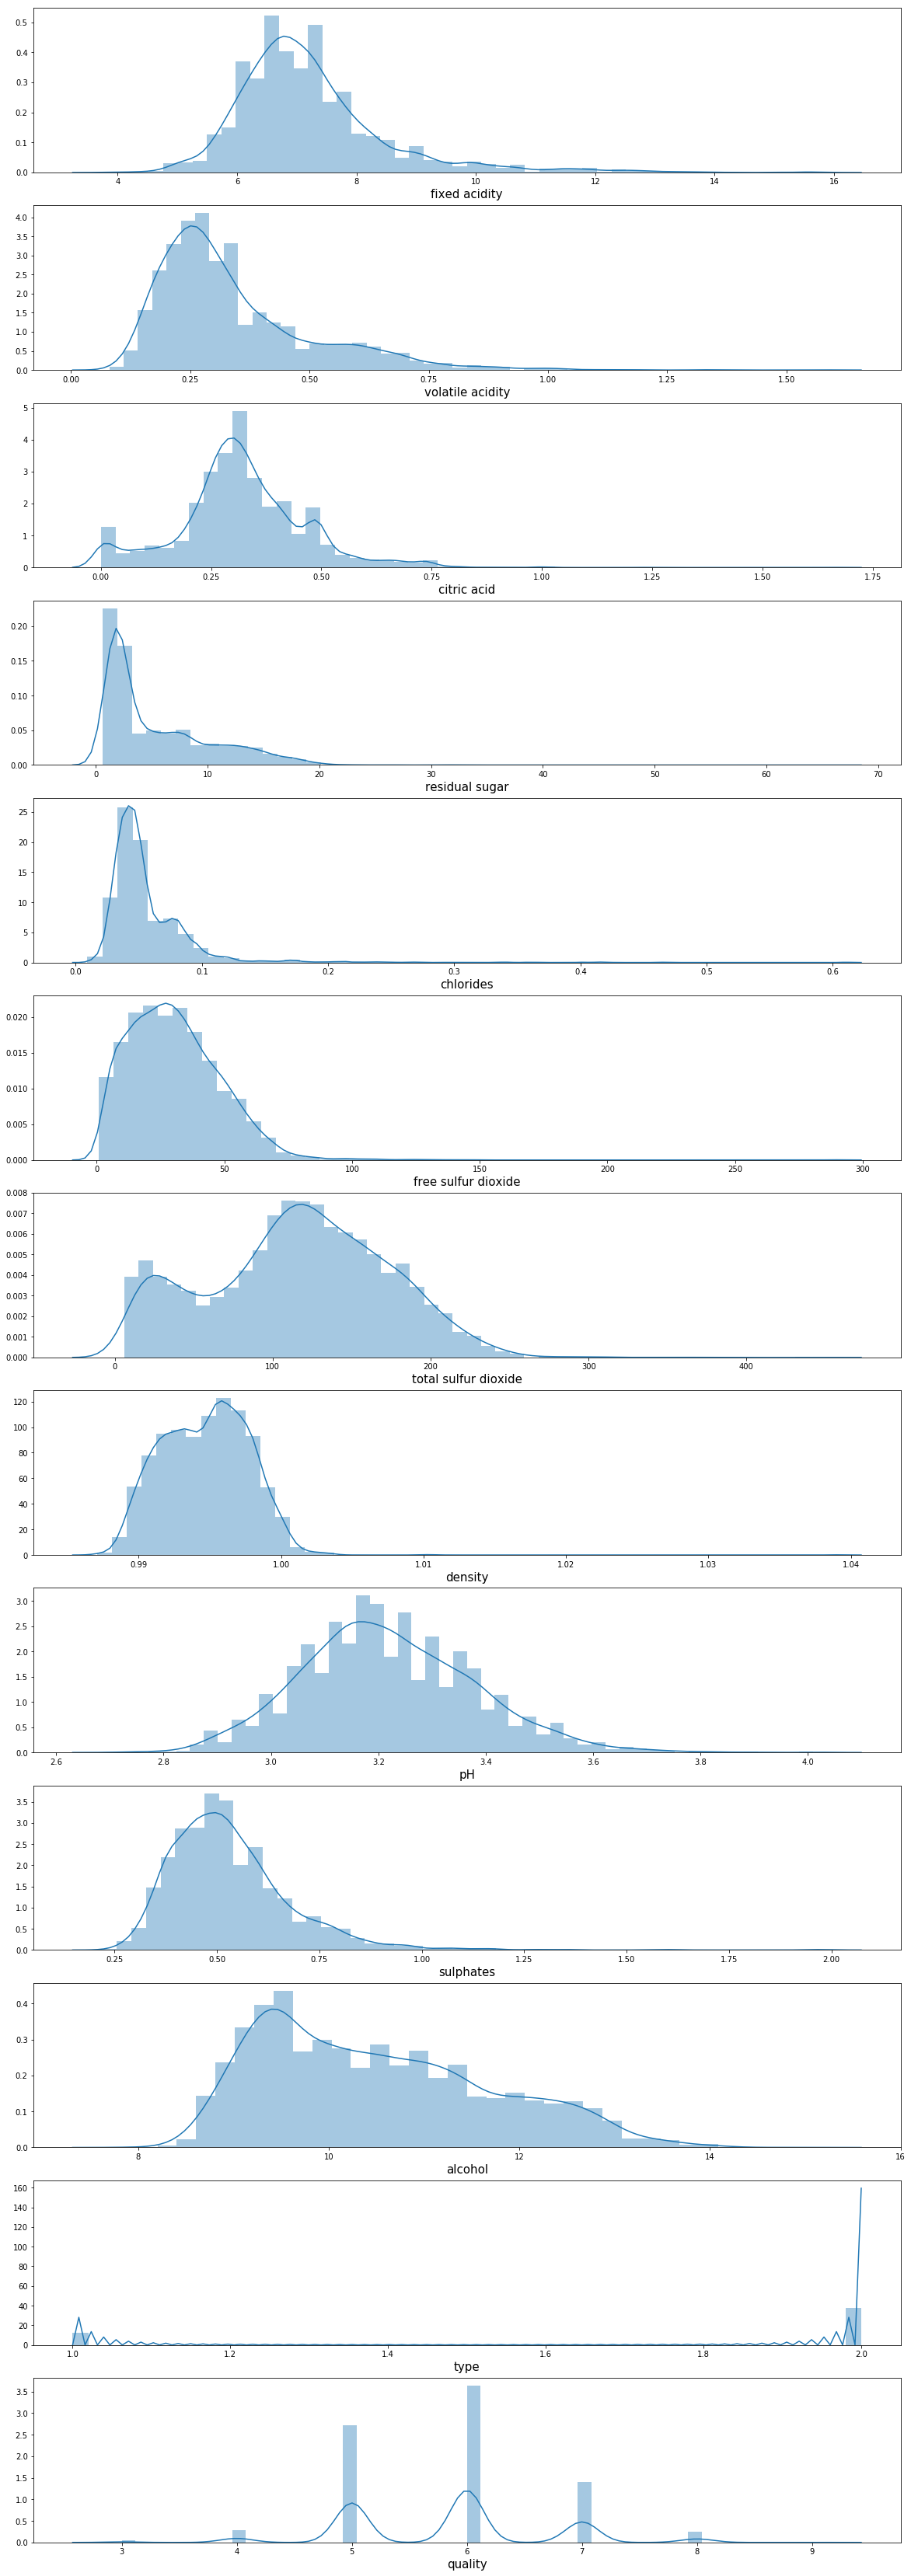

In [10]:
#histogram
# plot
f, axes = plt.subplots(len(df_train.columns), figsize=(20, 60), sharex=False)
for i in range(len(df_train.columns)):
    d = sns.distplot( df_train[df_train.columns[i]], ax=axes[i])
    d.set_xlabel(df_train.columns[i],fontsize=15)

The feature "type" seems to be ordinal, or categorical data with numeric representation. So there are chances it to be externally affect the distribuition of other features. Let's find the info of the dataset for each value of "type". 

In [6]:
df_train[df_train.type==1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.0,1267.000000
mean,8.315627,0.528062,0.270024,2.528887,0.088185,15.745462,45.799526,0.996735,3.310182,0.657624,10.407472,1.0,5.620363
std,1.769286,0.179372,0.194318,1.423095,0.048704,10.503466,32.941120,0.001906,0.156189,0.173801,1.068981,0.0,0.805978
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,1.0,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995575,3.200000,0.550000,9.500000,1.0,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,37.000000,0.996720,3.310000,0.620000,10.100000,1.0,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.091000,21.000000,61.000000,0.997825,3.400000,0.730000,11.100000,1.0,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.0,8.000000


In [7]:
df_train[df_train.type==2].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.0,3883.000000
mean,6.866199,0.278181,0.335341,6.387162,0.045639,35.492274,138.527556,0.994020,3.188076,0.489956,10.528423,2.0,5.886943
std,0.834061,0.101949,0.121562,5.137422,0.021351,17.294356,42.550165,0.003039,0.150550,0.114602,1.232551,0.0,0.886874
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,10.000000,0.987110,2.720000,0.220000,8.000000,2.0,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991700,3.090000,0.410000,9.500000,2.0,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,2.0,6.000000
75%,7.400000,0.320000,0.390000,9.950000,0.050000,46.000000,168.000000,0.996135,3.280000,0.550000,11.400000,2.0,6.000000
max,11.800000,1.100000,1.660000,65.800000,0.301000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,2.0,9.000000


We can see the mean, count, std and other central tendencies have changed for two different values of feature "type". We can assume that the ordinal values have different distributions. We can visualize this through box plots.

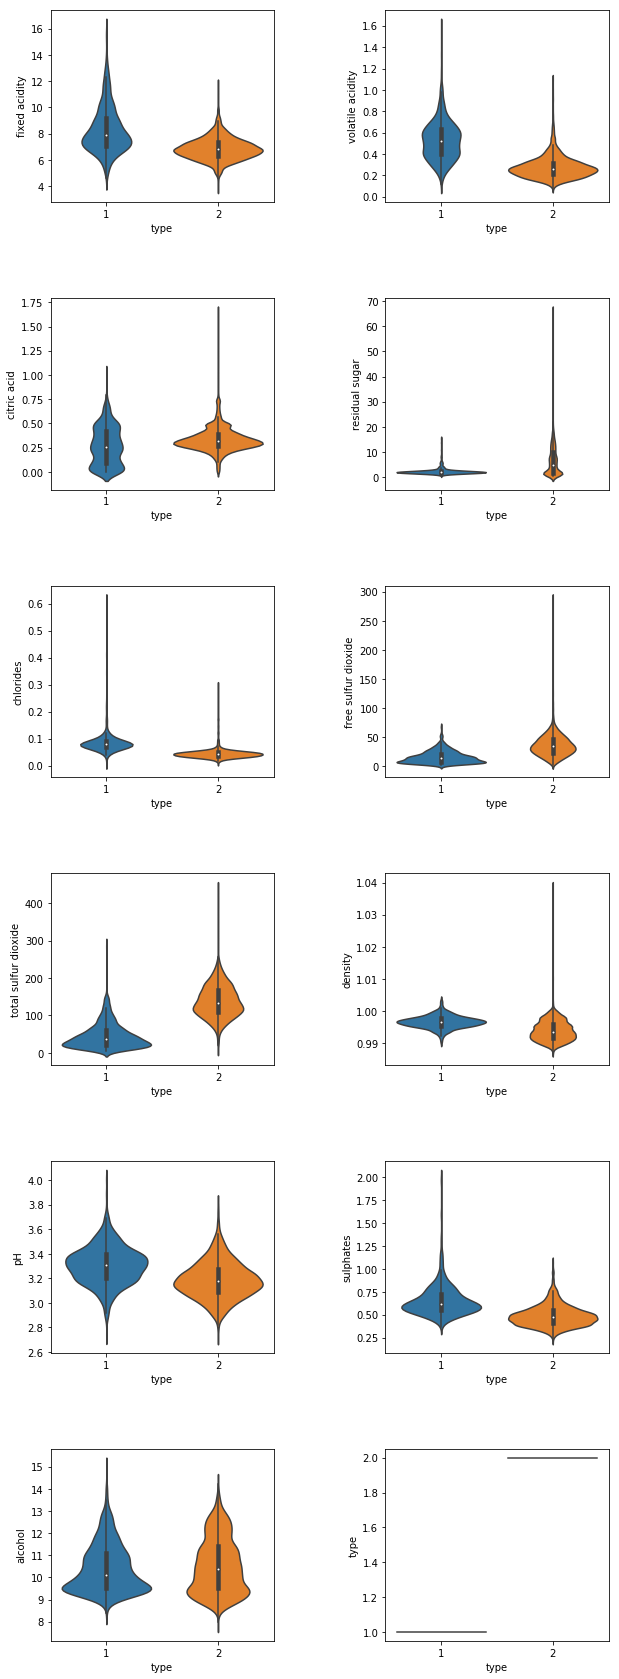

In [34]:
#sns.catplot(x="type",y="fixed acidity",kind='box',data=df_train)

n_rows = 6
n_cols = 2
count = 0

plt.subplots(n_rows, n_cols, figsize=(10, 30))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.violinplot(x="type",y=df_train.columns[count],data=df_train)
        count = count+1
plt.show()

# Correlation matrix (heatmap style)

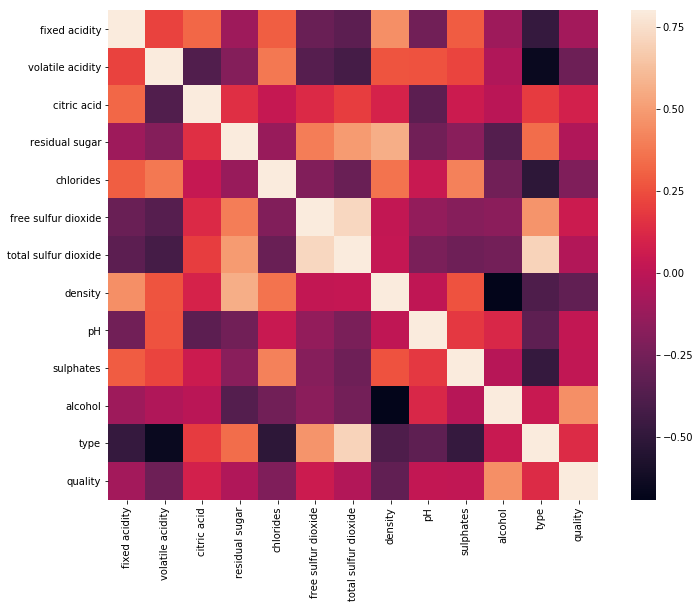

In [9]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Correlation matrix zoomed in

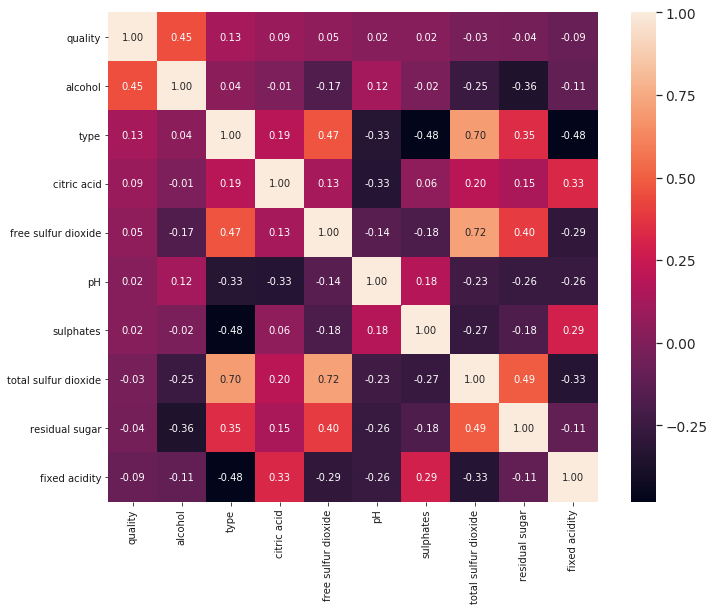

In [10]:
f, ax = plt.subplots(figsize=(12, 9))
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Explore scatter plot

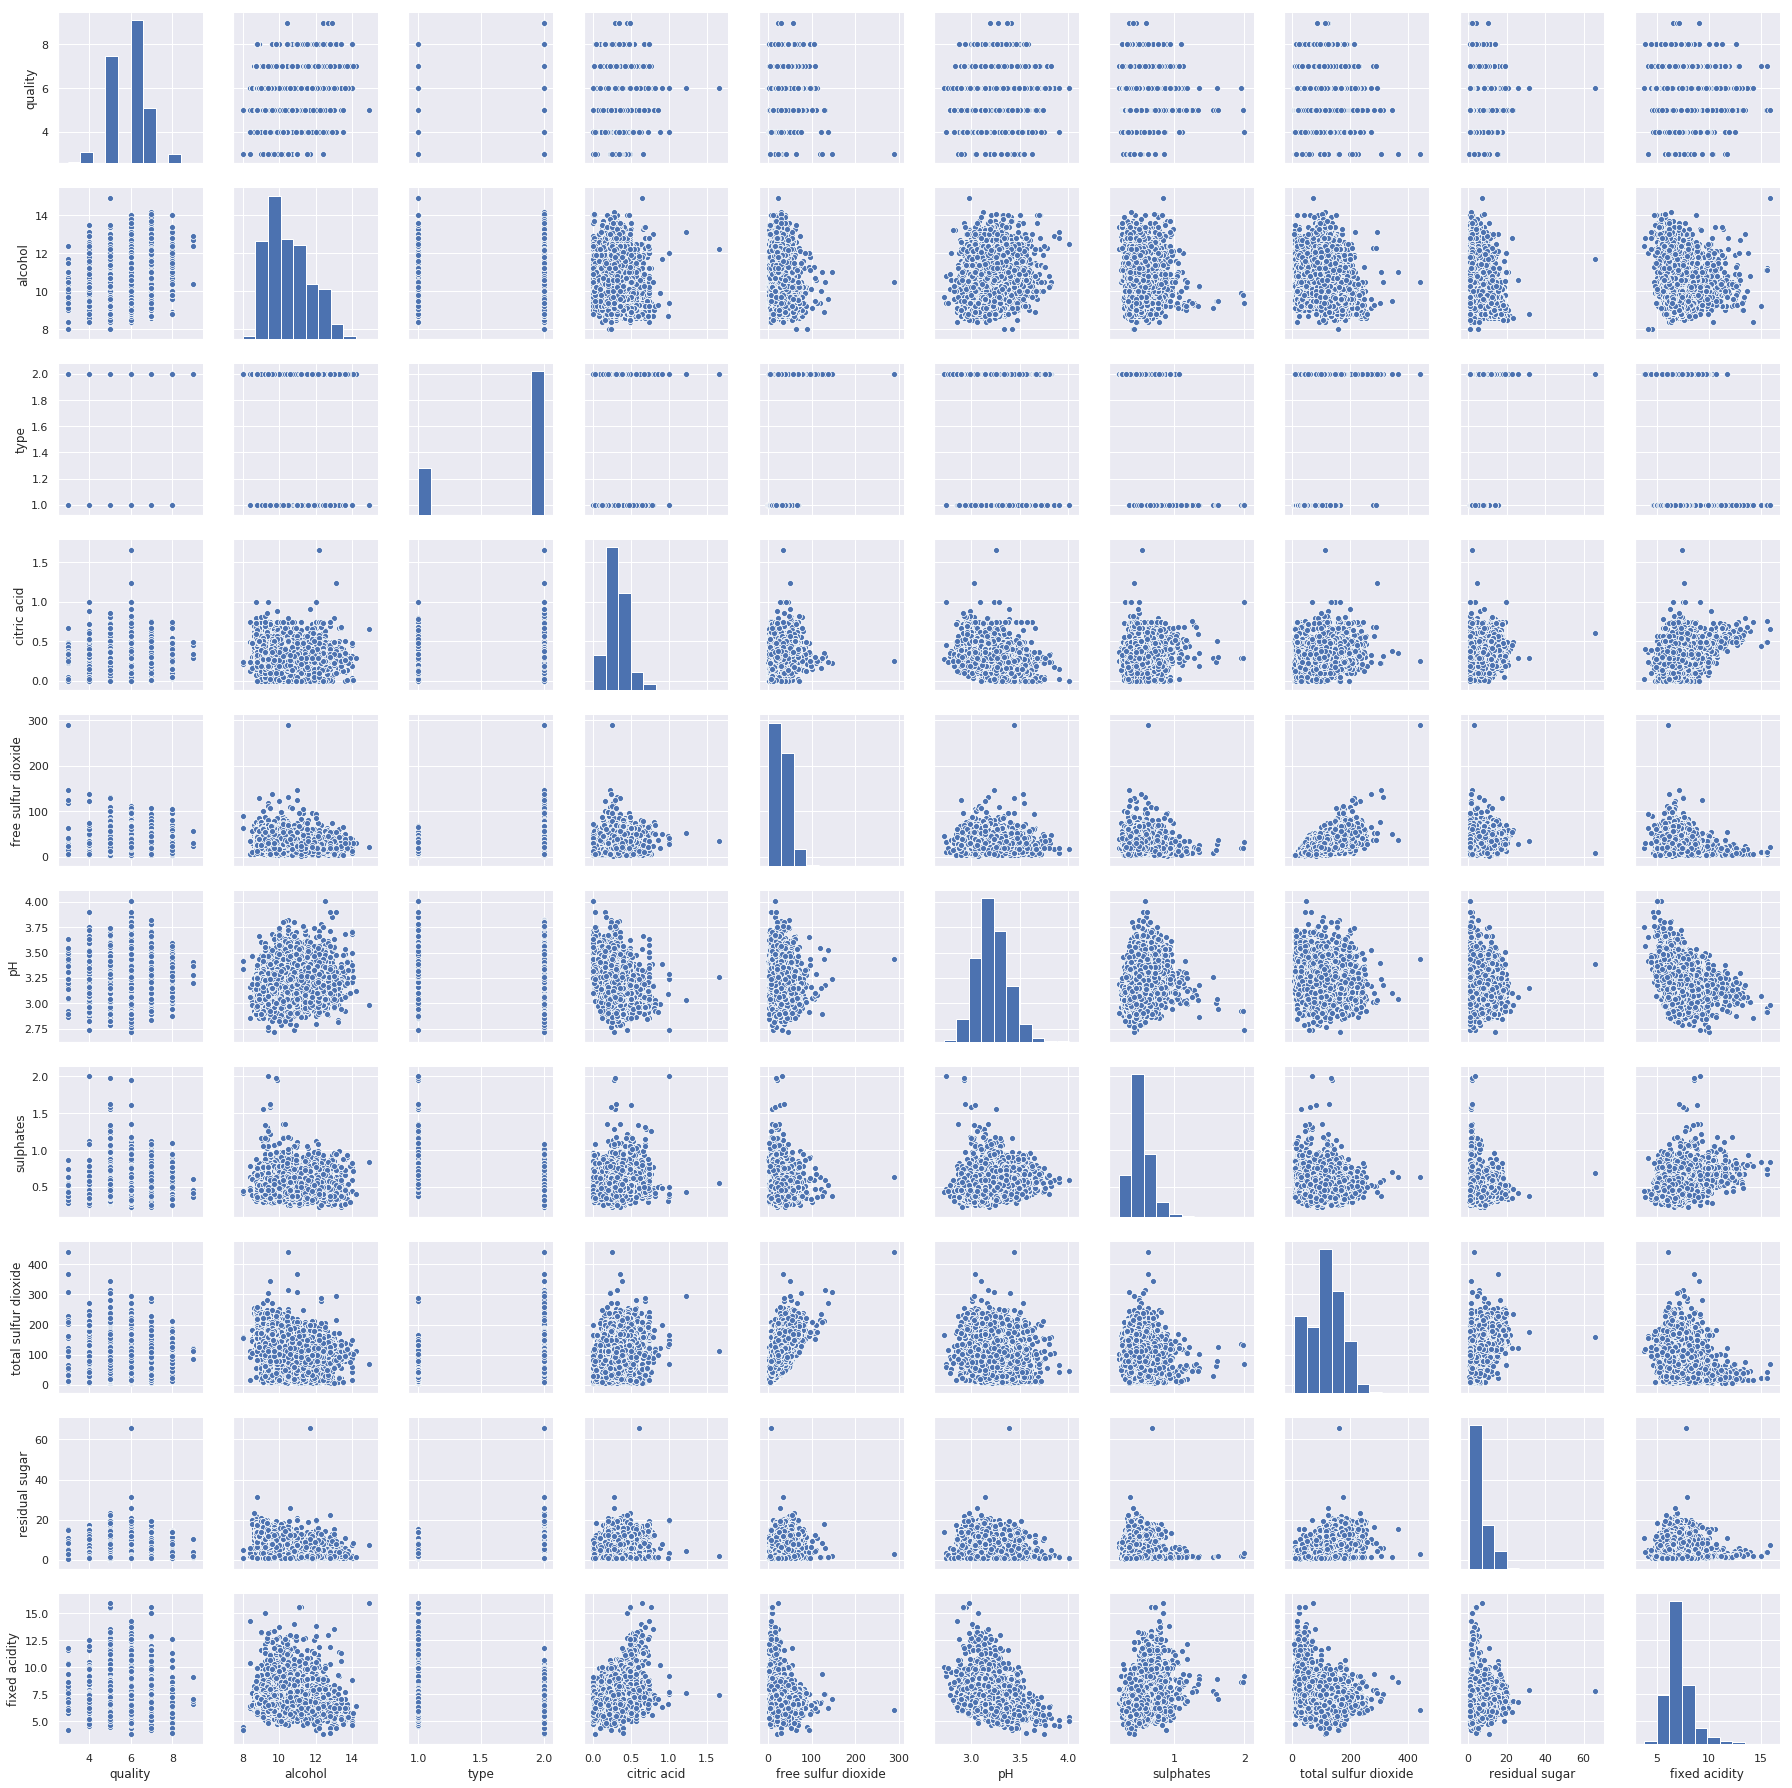

In [11]:
#scatterplot
sns.set()
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Explore and correction of missing values

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 13 columns):
fixed acidity           5150 non-null float64
volatile acidity        5150 non-null float64
citric acid             5150 non-null float64
residual sugar          5150 non-null float64
chlorides               5150 non-null float64
free sulfur dioxide     5150 non-null float64
total sulfur dioxide    5150 non-null float64
density                 5150 non-null float64
pH                      5150 non-null float64
sulphates               5150 non-null float64
alcohol                 5150 non-null float64
type                    5150 non-null int64
quality                 5150 non-null int64
dtypes: float64(11), int64(2)
memory usage: 523.1 KB


We can see there are no null values in this dataset. 

In [13]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.00000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,7.222786,0.339656,0.319272,5.437951,0.056106,30.634175,115.71466,0.994688,3.218117,0.531206,10.498667,1.753981,5.821359
std,1.297660,0.165322,0.145659,4.812319,0.035536,18.026858,56.80744,0.003037,0.160787,0.150149,1.195424,0.430732,0.875161
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,1.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.00000,0.992260,3.110000,0.430000,9.500000,2.000000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.00000,0.994860,3.200000,0.510000,10.300000,2.000000,6.000000
75%,7.700000,0.410000,0.400000,8.100000,0.065000,42.000000,156.00000,0.996987,3.320000,0.600000,11.300000,2.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,2.000000,9.000000


In [14]:
# If there are missing values in the dataset, we have to fill those up or drop
# https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

# Remove outliers

## Using z-score

In [15]:
#from scipy import stats
#import numpy as np

#z = np.abs(stats.zscore(df_train))
#threshold = 3
##print(np.where(z > 3))
#df_train_outliers = df_train[(z < threshold).all(axis=1)]
#print'Dataset size before removing outliers: ', df_train.shape
#print'Dataset size after removing outliers: ', df_train_outliers.shape

## Using IQR

In [16]:
#Q1 = df_train_outliers.quantile(0.25)
#Q3 = df_train_outliers.quantile(0.75)
#IQR = Q3 - Q1
#threshold = 1.5
## print(df_train_outliers < (Q1 - 1.5 * IQR)) |(df_train_outliers > (Q3 + 1.5 * IQR))
#df_train_final = df_train_outliers[~((df_train_outliers < (Q1 - threshold * IQR)) |(df_train_outliers > (Q3 + threshold * IQR))).any(axis=1)]
#print'Dataset size after removing outliers: ', df_train_final.shape

df_train_outliers = df_train

DBSCAN, Isolation Forest, Angle-Based Outlier Detection, k-Nearest Neighbors Detector, Histogram-based Outlier Detection, Local Correlation Integral (LOCI) etc: https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

# Modeling

The outcomes can be evaluated as simple ordinal values, since they varies from 1 to 10 integer values. Let's try to model it for solving classification problem. I will be trying SVM, KNN, Decision Trees and Random Forests.

## Convert ordinal data to one hot encoding

In [17]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas import Series
# define example
data = df_train_outliers['type']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


df_train_type_1 = df_train_outliers[df_train_outliers.type==1]
del df_train_type_1['type']
df_train_type_2 = df_train_outliers[df_train_outliers.type==2]
del df_train_type_2['type']


del df_train_outliers['type']
df_train_outliers['type_1'] = Series(onehot_encoded[:,0], index=df_train_outliers.index)
df_train_outliers['type_2'] = Series(onehot_encoded[:,1], index=df_train_outliers.index)
df_train_all = df_train_outliers

df_pred_type_1 = df_pred_all[df_pred_all.type==1]
df_pred_index_type_1 = df_pred_all[df_pred_all.type==1].index.values.astype(int)
del df_pred_type_1['type']

df_pred_type_2 = df_pred_all[df_pred_all.type==2]
df_pred_index_type_2 = df_pred_all[df_pred_all.type==2].index.values.astype(int)
del df_pred_type_2['type']


data = df_pred_all['type']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# remove type column
del df_pred_all['type']
# add new columns type_1 and type_2
df_pred_all['type_1'] = Series(onehot_encoded[:,0], index=df_pred_all.index)
df_pred_all['type_2'] = Series(onehot_encoded[:,1], index=df_pred_all.index)

[1 1 1 ... 2 2 2]
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1 1 1 ... 2 2 2]


## Split train-test set and rescaling features

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

feature_names = [u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol']
scaler = MinMaxScaler()

X_train_type_1 = df_train_type_1[feature_names]
y_train_type_1 = df_train_type_1['quality']

X_train_type_2 = df_train_type_2[feature_names]
y_train_type_2 = df_train_type_2['quality']

X_train_all = df_train_all[feature_names + [u'type_1', u'type_2']]
y_train_all = df_train_all['quality']

feature_names_all = feature_names + [u'type_1', u'type_2']
X = X_train_all
y = y_train_all

## Feature Engineering

### Tree based feaute selection: Find most important features

In [19]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
features = feature_names
imp = list(model.feature_importances_)
imp_features = sorted(zip(feature_names, imp), key=lambda pair: pair[1], reverse=True)
for f, imp in imp_features[:5]:
    print f, ': ', imp

alcohol :  0.1343828892763136
volatile acidity :  0.10022078689727906
density :  0.09828547101163856
total sulfur dioxide :  0.08601596063115904
free sulfur dioxide :  0.0851527555864979


### Recursive feature selection

In [20]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_
for i in range(len(fit.ranking_)):
    if fit.ranking_[i] == 1:
        print feature_names_all[i]

Num Features: 5
Selected Features: [False  True False False  True False False  True  True  True False False
 False]
Feature Ranking: [6 1 5 7 1 8 9 1 1 1 4 2 3]
volatile acidity
chlorides
density
pH
sulphates


### Univariate Selection: Chi Square test

In [21]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X_train_new = selector.transform(X)
indices = selector.get_support(indices=True)
for i in range(len(indices)):
    print feature_names[i]
    

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides


### L1 based feature selection

In [22]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

print X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, threshold='mean', prefit=True)
X_new = model.transform(X)

print X_new.shape

indices = model.get_support(indices=True)

for i in range(len(indices)):
    print feature_names[i]

(5150, 13)
(5150, 3)
fixed acidity
volatile acidity
citric acid


### Coefficient based feature selection

In [23]:
correlations = df_train_all.corr()['quality'].drop('quality')
print(correlations)
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

features = get_features(0.06)
print(features)

fixed acidity          -0.086983
volatile acidity       -0.272138
citric acid             0.086064
residual sugar         -0.039953
chlorides              -0.211849
free sulfur dioxide     0.054349
total sulfur dioxide   -0.033176
density                -0.315940
pH                      0.019526
sulphates               0.018163
alcohol                 0.450765
type_1                 -0.131204
type_2                  0.131204
Name: quality, dtype: float64
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'density', 'alcohol', 'type_1', 'type_2']


### Select top 5 features from this selections

In [35]:
def get_train_test(df, features):
    X = df[features]
    y = df['quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #scaler = MinMaxScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

#final_feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'density', 'alcohol']
final_feature_names = [ 'volatile acidity', 'total sulfur dioxide', 'free sulfur dioxide', 'density', 'alcohol']    
#final_feature_names = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X_train_t1, X_test_t1, y_train_t1, y_test_t1 =  get_train_test(df_train_type_1, final_feature_names)
X_train_t2, X_test_t2, y_train_t2, y_test_t2 =  get_train_test(df_train_type_2, final_feature_names)
X_train_all, X_test_all, y_train_all, y_test_all =  get_train_test(df_train_all, final_feature_names + ['type_1', 'type_2'])


X_pred_t1 = scaler.fit_transform(df_pred_type_1[final_feature_names])
X_pred_t2 = scaler.fit_transform(df_pred_type_2[final_feature_names])
X_pred_all = scaler.fit_transform(df_pred_all[final_feature_names + ['type_1', 'type_2']])

## Build model: Regression SVR

In [36]:
from sklearn.svm import SVR

#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
#               coef0=1)

svr_1 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train_t1, y_train_t1)
y_pred_t1 = np.around(svr_1.predict(X_test_t1))

svr_2 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train_t2, y_train_t2)
y_pred_t2 = np.around(svr_2.predict(X_test_t2))

svr_all = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train_all, y_train_all)
y_pred_all = np.around(svr_all.predict(X_test_all))


print 'MEA Type1:', mean_absolute_error(y_test_t1, y_pred_t1)
print 'MEA Type2:', mean_absolute_error(y_test_t2, y_pred_t2)
print 'MEA All:', mean_absolute_error(y_test_all, y_pred_all)

with open("output.csv","w+") as f:
    f.write('id,prediction\n')
    for i in range(len(y_pred_all)):
        f.write(str(i+1)+','+str(y_pred_all[i])+'\n')

MEA Type1: 0.4921259842519685
MEA Type2: 0.6640926640926641
MEA All: 0.6310679611650486


### Build model: Lienar Regression

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train_all, y_train_all) 
y_pred_all = np.around(regressor.predict(X_test_all))
print 'MEA All:', mean_absolute_error(y_test_all, y_pred_all)

MEA All: 0.5203883495145631


### Build Model: SGD Regressor

In [38]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train_all, y_train_all)
y_pred_all = np.around(clf.predict(X_test_all))
print 'MEA All:', mean_absolute_error(y_test_all, y_pred_all)

MEA All: 6601946008776.932


### Build model: Polynomial Regression

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
ft = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

#X = df_train_all[ft]
#y = df_train_all['quality']
# Data-set is divided into test data and train data based on test_size variable.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.1)
#X_pred_all = df_pred_all[ft]

# Fit the training data into polynomial model of degree 4 (appropriate value as per the data-set).
model = PolynomialFeatures(degree= 4)
#X = model.fit_transform(X)
X_train_t1_ = model.fit_transform(X_train_t1)
X_train_t2_ = model.fit_transform(X_train_t2)
X_test_t1_ = model.fit_transform(X_test_t1)
X_test_t2_ = model.fit_transform(X_test_t2)


X_train_all_ = model.fit_transform(X_train_all)
X_test_all_ = model.fit_transform(X_test_all)

X_pred_all_ = model.fit_transform(X_pred_all)

# Fit and predict the obtained polynomial model into linear regression.
# To Understand the relation between linear and polynomial regression visit the below link.
# http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions


r_t1 = LinearRegression().fit(X_train_t1_, y_train_t1)
r_t2 = LinearRegression().fit(X_train_t2_, y_train_t2)
r_all = LinearRegression().fit(X_train_all_, y_train_all)

def print_mae(regressor, X_test_all, y_test_all):
    y_pred_all = np.around(regressor.predict(X_test_all))
    y_pred_all = y_pred_all.clip(min=0)
    y_pred_all = y_pred_all.clip(max=10)
    print (mean_absolute_error(y_test_all, y_pred_all))

print_mae(r_t1, X_test_t1_, y_test_t1)
print_mae(r_t2, X_test_t2_, y_test_t2)
print_mae(r_all, X_test_all_, y_test_all)

0.468503937007874
0.51994851994852
0.516504854368932


## Build model: decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train_all, y_train_all)
y_pred_all = dt.predict(X_test_all)
print 'MEA:', mean_absolute_error(y_test_all, y_pred_all)
#print('Accuracy of Decision Tree classifier on training set: {:.2f}'
#     .format(dt.score(X_train, y_train)))
#print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#     .format(dt.score(X_test, y_test)))


#with open("output.csv","w+") as f:
#    f.write('id,prediction\n')
#    for i in range(len(y_pred_all)):
#        f.write(str(i+1)+','+str(y_pred_all[i])+'\n')

MEA: 0.541747572815534


## Build model: Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier


rf_1 = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train_t1, y_train_t1)
y_pred_t1 = rf_1.predict(X_test_t1)

rf_2 = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train_t2, y_train_t2)
y_pred_t2 = rf_2.predict(X_test_t2)

rf_all = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train_all, y_train_all)
y_pred_all = rf_all.predict(X_test_all)


print 'MEA:', mean_absolute_error(y_test_t1, y_pred_t1)
print 'MEA:', mean_absolute_error(y_test_t2, y_pred_t2)
print 'MEA:', mean_absolute_error(y_test_all, y_pred_all)


y_pred_t1 = rf_1.predict(X_pred_t1)
y_pred_t2 = rf_2.predict(X_pred_t2)
y_pred_all = rf_all.predict(X_pred_all)

with open("output.csv","w+") as f:
    f.write('id,prediction\n')
    for i in range(len(y_pred_all)):
        f.write(str(i+1)+','+str(y_pred_all[i])+'\n')

res = np.ones([df_pred_index_type_1.shape[0]+df_pred_index_type_2.shape[0]])

for i in range(len(y_pred_t1)):
   res[df_pred_index_type_1[i]] = y_pred_t1[i]

for i in range(len(y_pred_t2)):
   res[df_pred_index_type_2[i]] = y_pred_t2[i]

#with open("output1.csv","w+") as f:
#    f.write('id,prediction\n')
#    for i in range(len(res)):
#        f.write(str(i+1)+','+str(int(res[i]))+'\n')

#print('Accuracy of Random Forest classifier on training set: {:.2f}'
#     .format(rf.score(X_train, y_train)))
#print('Accuracy of Random Forest classifier on test set: {:.2f}'
#     .format(rf.score(X_test, y_test)))

MEA: 0.42913385826771655
MEA: 0.47876447876447875
MEA: 0.42135922330097086


## Build model: KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train_all, y_train_all)
y_pred_all = knn.predict(X_test_all)
print 'MEA:', mean_absolute_error(y_test_all, y_pred_all)
#print('Accuracy of K-NN classifier on training set: {:.2f}'
#     .format(knn.score(X_train, y_train)))
#print('Accuracy of K-NN classifier on test set: {:.2f}'
#     .format(knn.score(X_test, y_test)))

MEA: 0.5650485436893203


## Build model: LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train_all, y_train_all)
y_pred_all = lda.predict(X_test_all)
print 'MEA:', mean_absolute_error(y_test_all, y_pred_all)
#print('Accuracy of LDA classifier on training set: {:.2f}'
#     .format(lda.score(X_train, y_train)))
#print('Accuracy of LDA classifier on test set: {:.2f}'
#     .format(lda.score(X_test, y_test)))

MEA: 0.5184466019417475


## Build model: Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train_all, y_train_all)
y_pred_all = gnb.predict(X_test_all)
print 'MEA:', mean_absolute_error(y_test_all, y_pred_all)
#print('Accuracy of GNB classifier on training set: {:.2f}'
#     .format(gnb.score(X_train, y_train)))
#print('Accuracy of GNB classifier on test set: {:.2f}'
#     .format(gnb.score(X_test, y_test)))

MEA: 2.211650485436893


## Build model: SVM

In [34]:
from sklearn.svm import SVC

svm = SVC(gamma='scale', kernel='rbf', C=3).fit(X_train_all, y_train_all)
y_pred_all = svm.predict(X_test_all)
print 'MEA:', mean_absolute_error(y_test_all, y_pred_all)
#print('Accuracy of SVM classifier on training set: {:.2f}'
#     .format(svm.score(X_train, y_train)))
#print('Accuracy of SVM classifier on test set: {:.2f}'
#     .format(svm.score(X_test, y_test)))

MEA: 0.5349514563106796
